---
# 01. Setting
---

In [ ]:
# MLP 구현을 위한 모듈 선언
import torch 
import torch.nn as nn
import torchvision.datasets as dataset 
import torchvision.transforms as transform 
from torch.utils.data import DataLoader 

In [ ]:
# 폴더 경로 저장
datasetPath   = "/content/drive/MyDrive/dataset"
parameterPath =  "/content/drive/MyDrive/parameters"

In [ ]:
# Training dataset download 
mnist_train = dataset.MNIST(root  = datasetPath,                     
                            train = True,                            
                            transform = transform.ToTensor(),        
                            download  = True)                         

# Testing dataset download 
mnist_test = dataset.MNIST(root = datasetPath,
                           train = False,
                           transform = transform.ToTensor(),
                           download = True)

##### ① MLP 구현을 위해 필요한 모듈 import 
<h6><ul>  
    <li> import torch  
    <li> import torch.nn as nn  
    <li> import torchvision.datasets as dataset 
    <li> import torchvision.datasets as dataset 
    <li> import torchvision.transforms as transform 
    <li> from torch.utils.data import DataLoader </li> 
</ul></h6>  
<br>

##### ② Training dataset download 
<h6><ul>
    <li> datasetPath   = "/content/drive/MyDrive/dataset"<br>
         → dataset을 저장한 경로를 datasetPath변수에 저장
    <li> arameterPath =  "/content/drive/MyDrive/parameters"</li>
         → paramete를 저장한 경로를 parameterPath변수에 저장  
</ul></h6>
<br>

#### ③ Training dataset download  
<h6>  

```
mnist_train = dataset.MNIST(root  = datasetPath(),
                            train = True,  
                            transform = transform.ToTensor(),
                            download  = True) 
```  
<ul>
    <li> root = datasetPath<br>
    : MNIST(손글씨로 쓴 이미지 data)를 다운로드한 후 datasetPath에 저장할거임.<br>  
    → root = 어디에 저장할 것인지에 대한 경로 지정 변수
    <li> train = True<br>   
    : 훈련 데이터로 사용할 거임.<br>
    → train = 데이터 셋을 훈련 데이터로 사용할 건인지에 대한 여부 확인 변수
    <li> transform = transform.ToTensor()<br>
    : MNIST(손글씨로 쓴 이미지 data)를 3차원 형태로 변환할거임.<br>
    →transform = 데이터셋의 형태 지정 변수(=변환 변수)
    <li> download  = True<br>
    : 위에 옵션대로 데이터 셋을 다운로드할 거임.<br>
    → download = 옵션대로 조정한 데이터셋을 다운로드할건지에 대한 여부 확인 변수</li></ul><br>
▶ 위에 옵션대로 조정한 MNIST(손글씨로 쓴 이미지 data)를 다운로드한 후 mnist_train 변수가 이를 지정하도록 할거임.







---
# 02. Multi-Layer Perceptron 모델 정의 : 2-Layer
---

In [ ]:
# 2-Layer
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(in_features = 784, out_features = 100)
        self.fc2 = nn.Linear(in_features = 100, out_features = 10)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = x.view(-1, 28*28)
        y = self.sigmoid(self.fc1(x))
        y = self.fc2(y)
        return y

##### ① MLP 모델 생성 (1번째 함수 해석)
<h6><ul>
<li> super(MLP, self).__init__()<br>
    → super : 지도학습 시키는 명령어
<li> self.fc1 = nn.Linear(in_features = 784, out_features = 100)<br>
    → 첫 번째 레이어는 input으로 784개를 받고, output으론 100개를 준다는 뜻임. 
<li> self.fc2 = nn.Linear(in_features = 100, out_features = 10)<br>
    → 두 번째 레이어는 input으로 100개를 받고, output으론 10개를 준다는 뜻임. 
<li> self.sigmoid = nn.Sigmoid()<br>
    → activate function으로 Sigmoid 함수를 사용할 거임.</li></ul><br>

##### ② MLP 모델 생성 (2번째 함수 해석)
<h6><ul>
<li> x = x.view(-1, 28*28)<br>
    → 3차원 형태의 데이터셋(MNIST)을 x에 넣고 28*28크기의 1차원 형태의 데이터셋으로 변환함.<br>
    → 변환된 데이터셋(MNIST)를 변수 x에 저장함. 
<li> y = self.sigmoid(self.fc1(x))<br>
    → 데이터셋을 fc1의 옵션대로 조정한 후 변수 y에 저장함.<br>
<li> y = self.fc2(y)<br>
    → fc1의 옵션대로 조정된 데이터셋을 다시 fc2의 옵션대로 재조정한 후 변수 y에 저장함. </li></ul><br>
▶ 현재 상태 : 데이터셋(MNiST)이 총 2개의 레이어의 옵션에 의해 조정된 후 10개로 output됨. </h6>

---
# 03. Hyper-Parameter 지정
---

In [ ]:
batch_size = 100
learning_rate = 0.1
training_epochs = 15
loss_function = nn.CrossEntropyLoss()
network = MLP()

optimizer = torch.optim.SGD(network.parameters(), lr = learning_rate)
data_loader = DataLoader(dataset = mnist_train,
                          batch_size = batch_size,
                          shuffle = True,
                          drop_last = True)

##### ① Hyper-Parameter 지정 해석 - 1  
<h6><ul>
    <li> batch_size = 100<br>
        : 데이터셋(MNIST)를 묶음단위로 가져와서 각각을 처리할거임.<br>
        (Ex)<br>
ⓐ   1~100번에 해당하는 각각의 데이터셋(MNIST) 100개를 가지고와서 먼저 한바퀴를 돌면서 처리할거임.(1epoch)<br>
ⓑ   후에 101~200번까지.. 201~300번까지.. 데이터셋을 다 쓸때까지 100개씩 묶어서 한바퀴 기준으로 각각을 처리할 거임.</li>
    <li> learning_rate = 0.1<br>
        : 데이터셋(MNIST)에 영향을 주는 w와 b의 값을 0.1씩 변형해가며 최적의 Loss값을 갖는 MLP모델을 만들기위해 <br>값을 조정해나가는 과정임.</li>
    <li> loss_function = nn.CrossEntropyLoss()<br>
        : LossFunction으로 CrossEntropyLoss를 사용할 것임을 지정한 후 변수 loss_function에 이를 저장함.</li>
    <li> network = MLP() <br>
        : 신경망으로 MLP를 사용할 것임을 지정한 후 변수 network에 이를 저장함.</li></h6><br>

##### ② Hyper-Parameter 지정 해석 - 2  
<h6><ul>
    <li> optimizer = torch.optim.SGD(network.parameters(), lr = learning_rate)<br>
        : 얼만큼 값을 변형해 나갈것인지에 대한 여부를 저장하고 있는 learning_rate와 신경망 parameters를 이용하여, 최적의 Loss Function값을 갖는 구간을 찾는 알고리즘, optimizer을 생성함.</li><br>


```
data_loader = DataLoader(dataset = mnist_train,
                          batch_size = batch_size,
                          shuffle = True,
                          drop_last = True)
```  
<br>
    <li> dataset = mnist_train <br>  
        : mnist_train 변수에 저장되어 있는 변환된 데이터셋(MNIST)을 사용할거임.<br>
        → dataset : 사용할 데이터셋 지정 변수 
    <li> batch_size = batch_size<br>  
        : 100묶음씩 데이터셋(MNIST)을 가져올거임.<br>
        → batch_size : 데이터셋(MNIST)을 묶음의 형태로 몇개씩 가져올 것인지를 지정하는 변수 
    <li> shuffle = True<br>
        : 순서대로 정리되어 있는 데이터셋(MNIST)을 무작위로 섞어서 재배열된 형태로 이를 사용할 거임.<br>
        → shuffle : 무작위로 섞어서 재배열된 형태의 데이터셋을 사용할 것인지를 
        지정하는 변수
    <li> drop_last = True <br>
        : 데이터셋(MNIST)을 batch_size의 값만큼씩 묶은 후에 남는 데이터셋(MNIST)은 버릴거임.<br>
        → drop_last : batch_size의 값만큼씩 데이터셋을 묶은 후에 남는 데이터셋을 어떻게 처리할 것인지에 대해 이를 지정하는 변수<br>
        (trash or no-trash)
        </li>  
</ul></h6><br>


#####[ 정리 ]  
1. 최적의 LossFunction값을 갖는 구간을 찾기 위해 신경망 parameters와 learning_rate를 이용하여 알고리즘, optimizer을 생성함.<br>

2. data_loader : MLP모델을 만들기 위해 어떤 데이터셋을 사용할 것이고, 어떤 형태로 데이터셋을 사용할 것인지를 지정하는 변수임. <br><br>

#####[ 같은 말 ]
*   optimizer을 이용하여 최적의 w와 b값을 갖는 구간을 찾음.
*   최적의 Lossfunction값을 갖는 구간을 찾음.
*   좋은 MLP모델을 만들 수 있음.





---
# 04. Network Training
---

In [ ]:
# 1 epoch 내의 배치에 대한 반복 : iteration
for epoch in range(training_epochs):
    avg_cost = 0 
    total_batch = len(data_loader)

    for img, label in data_loader:
        pred = network(img)

        loss = loss_function(pred, label)
        optimizer.zero_grad()       # 기울기가 0인지점을 찾기위해 이동함.
        loss.backward()             # 이동방법 : Backpropagation
        optimizer.step()            # learning rate값만큼 w와 b값이 변하는 방향으로 optimizer 이동함.

        # 모든 배치에 대한 평균 loss 값 계산
        avg_cost += loss / total_batch
    
    print("Epoch: %d   Loss = %f" % (epoch+1, avg_cost))
print("Learning finished")

Epoch: 1   Loss = 1.156663
Epoch: 2   Loss = 0.447884
Epoch: 3   Loss = 0.358494
Epoch: 4   Loss = 0.321747
Epoch: 5   Loss = 0.299265
Epoch: 6   Loss = 0.282604
Epoch: 7   Loss = 0.268858
Epoch: 8   Loss = 0.256485
Epoch: 9   Loss = 0.245351
Epoch: 10   Loss = 0.235224
Epoch: 11   Loss = 0.225781
Epoch: 12   Loss = 0.217202
Epoch: 13   Loss = 0.208726
Epoch: 14   Loss = 0.201438
Epoch: 15   Loss = 0.194525
Learning finished


---
# 05. Weight parameter 저장 
---

In [ ]:
torch.save(network.state_dict(), parameterPath+"mlp_mnist.pth")

---
# 06. 저장된 Weight parameter 불러오기
---

In [ ]:
new_network = MLP()
new_network.load_state_dict(torch.load(parameterPath+"mlp_mnist.pth"))

<All keys matched successfully>

---
# 07. Training 된 Network 성능 확인
---

In [ ]:
with torch.no_grad():
    img_test = mnist_test.data.float()
    label_test = mnist_test.targets

    # 전체 test data를 한번에 계산
    prediction = network(img_test)

    correct_prediction = torch.argmax(prediction, 1) == label_test
    accuracy = correct_prediction.float().mean()
    print("Accuracy:", accuracy.item())

Accuracy: 0.9452999830245972


---
# 08. 예측 결과 값 확인
---

In [ ]:
# Test dataset 중 첫번째 Image 추출
first_data = mnist_test.data[0]

with torch.no_grad():
    predcition = network(first_data.view(-1, 784). float())
print(predcition)

tensor([[ 0.8385, -6.2760,  4.3639,  5.0523, -3.3034, -2.7419, -9.6230, 12.6209,
         -2.4834,  1.9886]])


In [ ]:
# 예측 점수가 가장 높은 숫자 가져오기 
prediction_num = torch.argmax(prediction)
print("예측 값은 %d 입니다." %(prediction_num))

예측 값은 26057 입니다.


---
# 09. 정답 이미지 확인
---

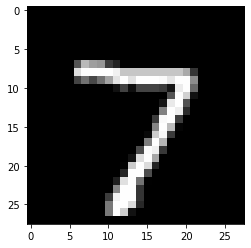

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(first_data, cmap="gray")
plt.show()